<a href="https://colab.research.google.com/github/hc2twv/UPSE_OP/blob/main/SistemaDASEdificio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Supongamos que queremos diseñar un sistema DAS para mejorar la cobertura en un edificio grande y complejo, como un centro comercial. En este caso, queremos optimizar la ubicación de antenas DAS para asegurar la cobertura en todo el edificio.

Ejemplo de Sistema DAS en un Centro Comercial
Configuración del Edificio: Imaginemos que el centro comercial está representado por una cuadrícula donde algunas celdas representan paredes que las señales no pueden atravesar. Necesitamos ubicar un cierto número de antenas para asegurar la cobertura en todas las áreas accesibles.

Población Inicial: Generamos configuraciones iniciales de antenas en la cuadrícula.

Evaluación de Cobertura: Calculamos cuántas celdas accesibles están cubiertas por las antenas.

Optimización: Usamos un algoritmo genético para optimizar las ubicaciones de las antenas.

Implementación en Python
A continuación, te presento el código para este ejemplo:

Generación 1, Mejor Aptitud: 189.0
Generación 2, Mejor Aptitud: 195.0
Generación 3, Mejor Aptitud: 205.0
Generación 4, Mejor Aptitud: 198.0
Generación 5, Mejor Aptitud: 198.0
Generación 6, Mejor Aptitud: 198.0
Generación 7, Mejor Aptitud: 204.0
Generación 8, Mejor Aptitud: 204.0
Generación 9, Mejor Aptitud: 196.0
Generación 10, Mejor Aptitud: 205.0
Generación 11, Mejor Aptitud: 197.0
Generación 12, Mejor Aptitud: 200.0
Generación 13, Mejor Aptitud: 201.0
Generación 14, Mejor Aptitud: 197.0
Generación 15, Mejor Aptitud: 204.0
Generación 16, Mejor Aptitud: 198.0
Generación 17, Mejor Aptitud: 198.0
Generación 18, Mejor Aptitud: 195.0
Generación 19, Mejor Aptitud: 192.0
Generación 20, Mejor Aptitud: 194.0
Generación 21, Mejor Aptitud: 194.0
Generación 22, Mejor Aptitud: 200.0
Generación 23, Mejor Aptitud: 189.0
Generación 24, Mejor Aptitud: 191.0
Generación 25, Mejor Aptitud: 194.0
Generación 26, Mejor Aptitud: 196.0
Generación 27, Mejor Aptitud: 198.0
Generación 28, Mejor Aptitud: 192.0
G

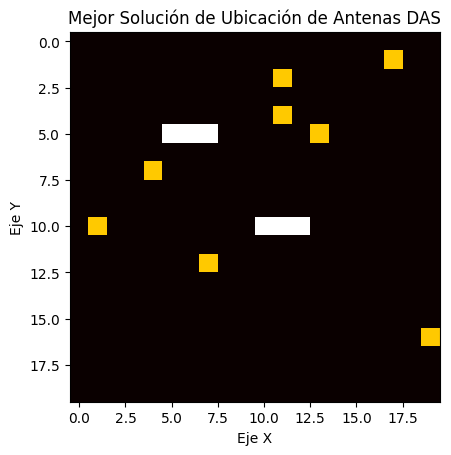

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del DAS y del edificio
grid_size = 20  # Tamaño de la cuadrícula
num_antennas = 8  # Número de antenas en el DAS
population_size = 50  # Tamaño de la población de soluciones
generations = 300  # Número de generaciones para evolucionar
mutation_rate = 0.1  # Tasa de mutación
wall_cells = [(5, 5), (5, 6), (5, 7), (10, 10), (10, 11), (10, 12)]  # Coordenadas de paredes

# Inicializar una población de posibles ubicaciones de antenas
def initialize_population(pop_size, num_antennas, grid_size):
    """
    Genera una población inicial de posibles soluciones, donde cada solución es un arreglo de
    coordenadas (x, y) representando la ubicación de las antenas en la cuadrícula.

    Args:
    pop_size (int): Tamaño de la población.
    num_antennas (int): Número de antenas.
    grid_size (int): Tamaño de la cuadrícula.

    Returns:
    list: Lista de soluciones iniciales.
    """
    return [np.random.randint(0, grid_size, size=(num_antennas, 2)) for _ in range(pop_size)]

# Calcular la cobertura de una solución
def calculate_coverage(solution, grid_size, wall_cells):
    """
    Calcula la cobertura proporcionada por un conjunto de antenas en la cuadrícula.

    Args:
    solution (ndarray): Arreglo de coordenadas (x, y) de las antenas.
    grid_size (int): Tamaño de la cuadrícula.
    wall_cells (list): Lista de coordenadas que representan las paredes.

    Returns:
    int: Número de celdas cubiertas.
    """
    coverage_grid = np.zeros((grid_size, grid_size))
    for x, y in solution:
        if (x, y) in wall_cells:
            continue  # Ignorar antenas ubicadas en paredes
        for i in range(grid_size):
            for j in range(grid_size):
                if (i, j) not in wall_cells and np.sqrt((x - i) ** 2 + (y - j) ** 2) <= 3:
                    coverage_grid[i][j] = 1
    return np.sum(coverage_grid)

# Evaluar la aptitud de cada individuo en la población
def evaluate_population(population, grid_size, wall_cells):
    """
    Evalúa la aptitud de cada solución en la población.

    Args:
    population (list): Población de soluciones.
    grid_size (int): Tamaño de la cuadrícula.
    wall_cells (list): Lista de coordenadas que representan las paredes.

    Returns:
    list: Lista de valores de aptitud para cada solución.
    """
    return [calculate_coverage(individual, grid_size, wall_cells) for individual in population]

# Seleccionar padres para el cruce basado en su aptitud
def select_parents(population, fitness):
    """
    Selecciona dos soluciones (padres) de la población para el cruce, basado en sus valores de aptitud.

    Args:
    population (list): Población de soluciones.
    fitness (list): Lista de valores de aptitud para cada solución.

    Returns:
    tuple: Dos soluciones seleccionadas como padres.
    """
    selected = random.choices(population, weights=fitness, k=2)
    return selected

# Cruzar dos padres para generar un hijo
def crossover(parent1, parent2):
    """
    Realiza el cruce entre dos soluciones (padres) para generar una nueva solución (hijo).

    Args:
    parent1 (ndarray): Primera solución padre.
    parent2 (ndarray): Segunda solución padre.

    Returns:
    ndarray: Nueva solución generada por el cruce.
    """
    crossover_point = random.randint(0, len(parent1) - 1)
    child = np.vstack((parent1[:crossover_point], parent2[crossover_point:]))
    return child

# Mutar un hijo introduciendo variabilidad
def mutate(child, mutation_rate, grid_size):
    """
    Aplica mutación a una solución (hijo) para introducir variabilidad.

    Args:
    child (ndarray): Solución hijo.
    mutation_rate (float): Tasa de mutación.
    grid_size (int): Tamaño de la cuadrícula.

    Returns:
    ndarray: Solución mutada.
    """
    for i in range(len(child)):
        if random.random() < mutation_rate:
            child[i] = np.random.randint(0, grid_size, size=2)
    return child

# Algoritmo Genético Principal para optimizar el DAS
def genetic_algorithm(grid_size, num_antennas, pop_size, generations, mutation_rate, wall_cells):
    """
    Implementa el algoritmo genético para optimizar la ubicación de las antenas en el sistema DAS.

    Args:
    grid_size (int): Tamaño de la cuadrícula.
    num_antennas (int): Número de antenas.
    pop_size (int): Tamaño de la población.
    generations (int): Número de generaciones.
    mutation_rate (float): Tasa de mutación.
    wall_cells (list): Lista de coordenadas que representan las paredes.

    Returns:
    ndarray: Mejor solución encontrada.
    """
    population = initialize_population(pop_size, num_antennas, grid_size)

    for generation in range(generations):
        fitness = evaluate_population(population, grid_size, wall_cells)
        new_population = []

        for _ in range(pop_size // 2):
            parent1, parent2 = select_parents(population, fitness)
            child1 = mutate(crossover(parent1, parent2), mutation_rate, grid_size)
            child2 = mutate(crossover(parent2, parent1), mutation_rate, grid_size)
            new_population.extend([child1, child2])

        population = new_population

        # Imprimir la mejor solución de cada generación
        best_fitness = max(fitness)
        print(f'Generación {generation + 1}, Mejor Aptitud: {best_fitness}')

    # Retornar la mejor solución encontrada
    best_solution_index = fitness.index(max(fitness))
    return population[best_solution_index]

# Ejecutar el algoritmo genético para optimizar la ubicación de las antenas DAS
best_solution = genetic_algorithm(grid_size, num_antennas, population_size, generations, mutation_rate, wall_cells)
print('Mejor Solución:', best_solution)

# Visualización de la mejor solución
def visualize_solution(solution, grid_size, wall_cells):
    """
    Visualiza la mejor solución encontrada en la cuadrícula, mostrando la ubicación de las antenas y las paredes.

    Args:
    solution (ndarray): Mejor solución encontrada.
    grid_size (int): Tamaño de la cuadrícula.
    wall_cells (list): Lista de coordenadas que representan las paredes.
    """
    grid = np.zeros((grid_size, grid_size))
    for x, y in solution:
        grid[x, y] = 2  # Marcar la posición de las antenas
    for x, y in wall_cells:
        grid[x, y] = 3  # Marcar las paredes
    plt.imshow(grid, cmap='hot', interpolation='nearest')
    plt.title('Mejor Solución de Ubicación de Antenas DAS')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.show()

visualize_solution(best_solution, grid_size, wall_cells)


Explicación del Código

Inicialización de la Población: Se genera una población inicial de ubicaciones de antenas de manera aleatoria en la cuadrícula, evitando las celdas que representan paredes.

Evaluación de Cobertura: Se calcula la cobertura de cada solución, considerando que las señales no pueden atravesar las paredes.

Selección de Padres, Cruzamiento y Mutación: Se seleccionan las mejores configuraciones de antenas, se combinan y se mutan para explorar nuevas configuraciones.

Iteración del Algoritmo Genético: El proceso se repite por varias generaciones para mejorar iterativamente las configuraciones de antenas y maximizar la cobertura.

Visualización: Al final, se visualiza la mejor solución encontrada mostrando las posiciones de las antenas y las paredes.